In [2]:
import pandas as pd
import pickle

In [6]:
#import the data

loyalty_scores =pd.read_excel("data/grocery_database.xlsx", sheet_name = "loyalty_scores")
customer_details =pd.read_excel("data/grocery_database.xlsx", sheet_name = "customer_details")
transactions =pd.read_excel("data/grocery_database.xlsx", sheet_name = "transactions")



In [7]:
loyalty_scores

,customer_id,customer_loyalty_score
0,104,0.587
1,69,0.156
2,525,0.959
3,181,0.418
4,796,0.570
...,...,...
395,705,0.637
396,864,0.657
397,346,0.410
398,511,0.687


In [8]:
customer_details

,customer_id,distance_from_store,gender,credit_score
0,74,3.38,F,0.59
1,524,4.76,F,0.52
2,607,4.45,F,0.49
3,343,0.91,M,0.54
4,322,3.02,F,0.63
...,...,...,...,...
865,372,4.38,F,0.50
866,104,2.36,F,0.63
867,393,1.87,M,0.59
868,373,0.21,M,0.47


In [9]:
transactions

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost
0,1,2020-04-10,435657533999,3,7,19.16
1,1,2020-04-10,435657533999,2,5,7.71
2,1,2020-06-02,436189770685,4,4,26.97
3,1,2020-06-02,436189770685,1,2,38.52
4,1,2020-06-10,436265380298,4,4,22.13
...,...,...,...,...,...,...
38501,870,2020-09-23,437316479610,5,4,51.61
38502,870,2020-09-23,437316479610,2,15,33.77
38503,870,2020-09-30,437385547544,5,3,23.46
38504,870,2020-09-30,437385547544,1,1,18.52


 how="left"

This is VERY important.

Left join means:

👉 Keep ALL rows from: customer_details (left table)


LEFT JOIN is used because:

👉 We do NOT want to lose customers without loyalty score.


In [15]:
#create the customer level dataset
# we combining two table
data_for_regression = pd.merge(customer_details, loyalty_scores, how = "left", on="customer_id")
data_for_regression

,customer_id,distance_from_store,gender,credit_score,customer_loyalty_score
0,74,3.38,F,0.59,0.263
1,524,4.76,F,0.52,0.298
2,607,4.45,F,0.49,0.337
3,343,0.91,M,0.54,0.873
4,322,3.02,F,0.63,0.350
...,...,...,...,...,...
865,372,4.38,F,0.50,0.321
866,104,2.36,F,0.63,0.587
867,393,1.87,M,0.59,NaN
868,373,0.21,M,0.47,0.972


 groupby("customer_id")

This tells pandas: 👉 Group all rows that belong to the same customer.

Aggregate = summarize grouped data.

You define how each column should be summarized.

⸻

⭐ "sales_cost": "sum"

👉 Total money spent by customer.

⸻

⭐ "num_items": "sum"

👉 Total items purchased.

⸻

⭐ "transaction_id": "count"

👉 Number of transactions.

⸻

⭐ "product_area_id": "nunique"

👉 Number of unique product categories purchased.

In [16]:
sales_summary = transactions.groupby("customer_id").agg({"sales_cost": "sum",
                                                         "num_items" : "sum",
                                                         "transaction_id":"count",
                                                         "product_area_id" : "nunique"}).reset_index()
sales_summary

,customer_id,sales_cost,num_items,transaction_id,product_area_id
0,1,3980.49,424,51,5
1,2,2056.91,213,52,5
2,3,324.22,65,12,4
3,4,3499.39,278,47,5
4,5,6609.19,987,106,5
...,...,...,...,...,...
865,866,1005.04,226,49,4
866,867,2249.73,244,52,5
867,868,1748.45,329,56,5
868,869,1209.85,184,54,5


renaming the column names

In [18]:
sales_summary.columns = ["customer_id", "total_sales", "total_items", "transaction_count", "product_area_count"]
sales_summary

,customer_id,total_sales,total_items,transaction_count,product_area_count
0,1,3980.49,424,51,5
1,2,2056.91,213,52,5
2,3,324.22,65,12,4
3,4,3499.39,278,47,5
4,5,6609.19,987,106,5
...,...,...,...,...,...
865,866,1005.04,226,49,4
866,867,2249.73,244,52,5
867,868,1748.45,329,56,5
868,869,1209.85,184,54,5


Average basket value tells:

👉 How much money customer spends per visit.

In [21]:
sales_summary["average_basket_value"] = sales_summary["total_sales"] / sales_summary["transaction_count"]

sales_summary

,customer_id,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,1,3980.49,424,51,5,78.048824
1,2,2056.91,213,52,5,39.555962
2,3,324.22,65,12,4,27.018333
3,4,3499.39,278,47,5,74.455106
4,5,6609.19,987,106,5,62.350849
...,...,...,...,...,...,...
865,866,1005.04,226,49,4,20.511020
866,867,2249.73,244,52,5,43.264038
867,868,1748.45,329,56,5,31.222321
868,869,1209.85,184,54,5,22.404630


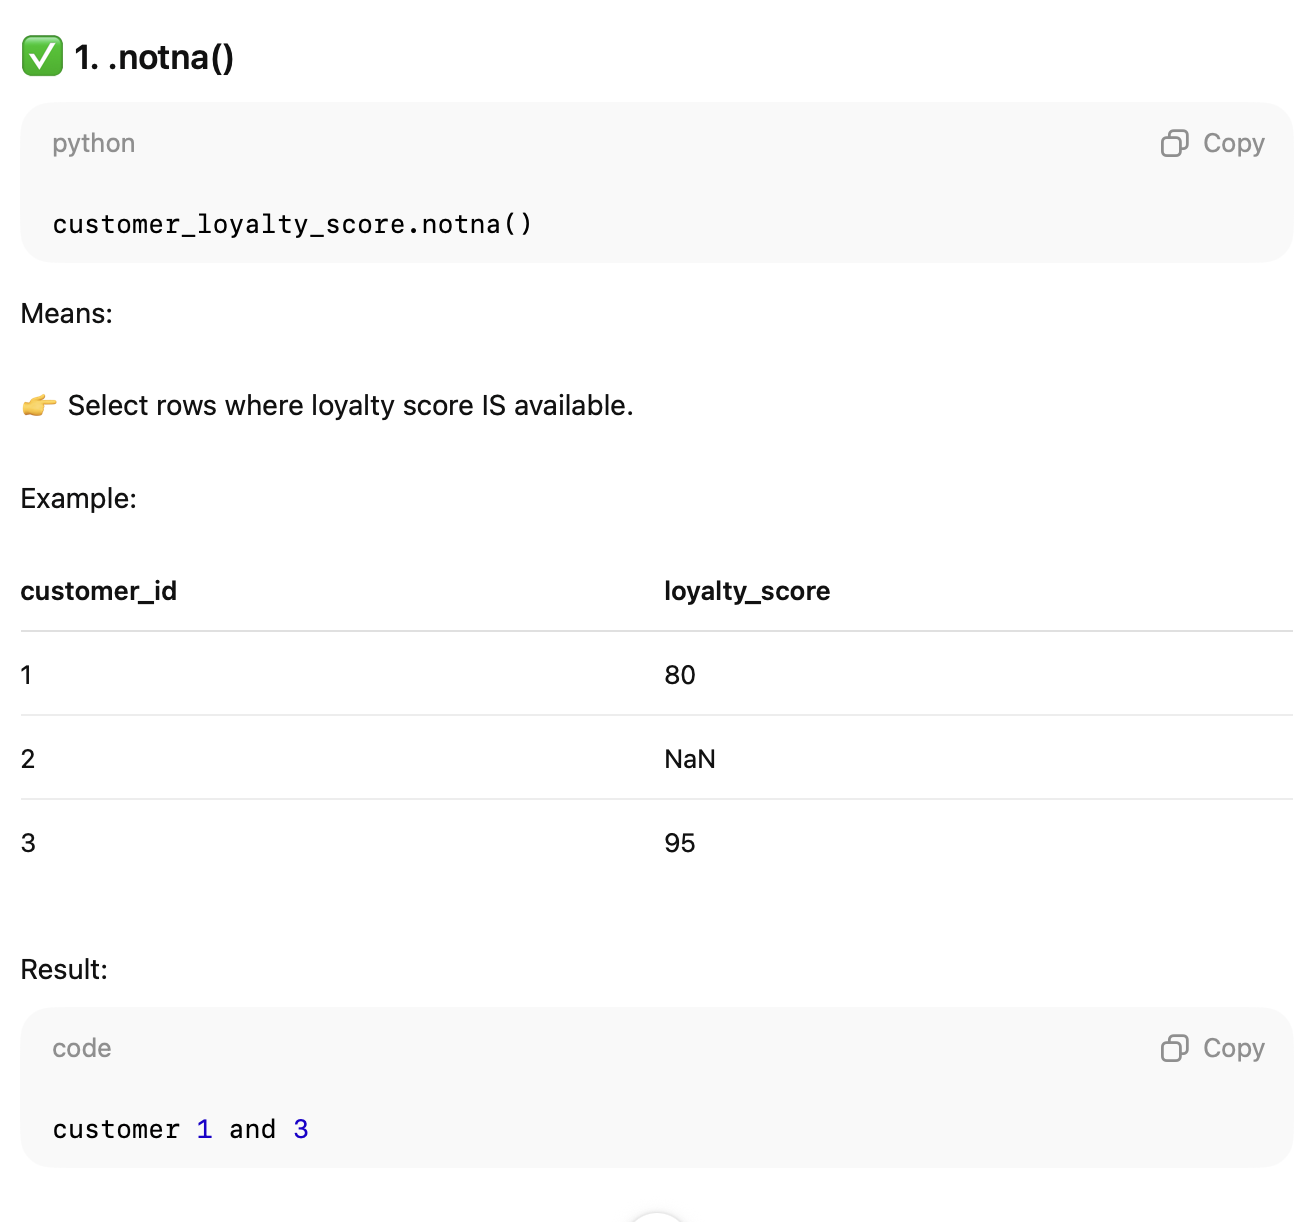

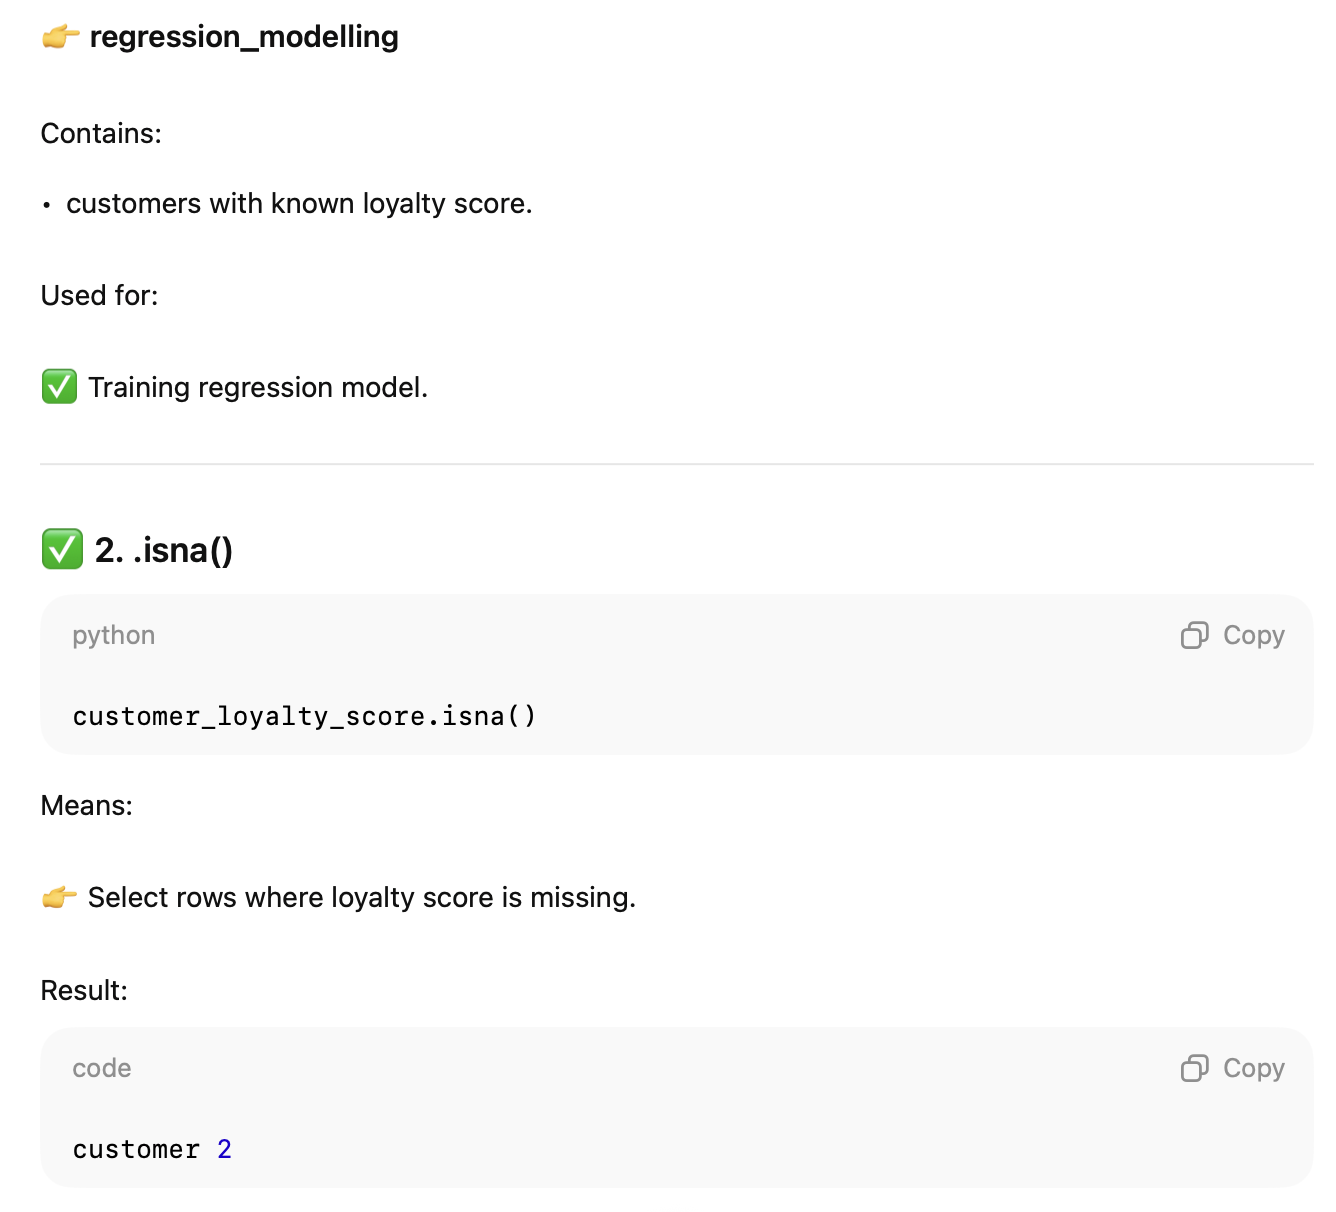

data_for_regression
        |
        |--- notna() → regression_modelling (training)
        |
        |--- isna() → regression_scoring (future prediction)

In [30]:
regression_modelling = data_for_regression.loc[data_for_regression["customer_loyalty_score"].notna()]
regression_scoring = data_for_regression.loc[data_for_regression["customer_loyalty_score"].isna()]
regression_modelling

,customer_id,distance_from_store,gender,credit_score,customer_loyalty_score
0,74,3.38,F,0.59,0.263
1,524,4.76,F,0.52,0.298
2,607,4.45,F,0.49,0.337
3,343,0.91,M,0.54,0.873
4,322,3.02,F,0.63,0.350
...,...,...,...,...,...
862,4,2.14,M,0.64,0.564
865,372,4.38,F,0.50,0.321
866,104,2.36,F,0.63,0.587
868,373,0.21,M,0.47,0.972


In [23]:
regression_scoring

,customer_id,distance_from_store,gender,credit_score,customer_loyalty_score
6,1,4.78,F,0.66,NaN
7,120,3.49,F,0.38,NaN
8,52,14.91,F,0.68,NaN
10,435,0.25,M,0.62,NaN
12,679,4.74,F,0.58,NaN
...,...,...,...,...,...
860,711,400.97,F,0.54,NaN
861,309,0.32,M,0.38,NaN
863,765,1.62,M,0.63,NaN
864,466,4.36,F,0.54,NaN


In [31]:
regression_scoring = regression_scoring.drop(
    ["customer_loyalty_score"],
    axis=1
)

regression_scoring

,customer_id,distance_from_store,gender,credit_score
6,1,4.78,F,0.66
7,120,3.49,F,0.38
8,52,14.91,F,0.68
10,435,0.25,M,0.62
12,679,4.74,F,0.58
...,...,...,...,...
860,711,400.97,F,0.54
861,309,0.32,M,0.38
863,765,1.62,M,0.63
864,466,4.36,F,0.54


✅ pickle.dump()

Function used to:

👉 save Python object into file.


"wb"

Means: write binary mode

In [32]:
# Save our files

pickle.dump(regression_modelling, open("data/abc_regression_modelling.p", "wb"))
pickle.dump(regression_scoring, open("data/abc_regression_scoring.p", "wb"))